In [2]:
import numpy as np
from lib.envs.blackjack import BlackjackEnv
from lib import plotting
import sys
from collections import defaultdict
import matplotlib

matplotlib.style.use('ggplot')

In [3]:
env = BlackjackEnv()

In [4]:
# ε-greedy策略
def make_epsilon_greedy_policy(Q, epsilon, nA):
    def policy_fn(observation):
        A = np.ones(nA, dtype = float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1. - epsilon)
        return A
    return policy_fn

In [16]:
def value_iteration(env, num_episodes, discount_factor = 1., epsilon = 0.1):
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i in range(1, num_episodes + 1):
        if i % 1000 == 0:
            print(f"\r {i}/{num_episodes}回合.", end="")
            sys.stdout.flush()
            
        episode = []
        state = env.reset()
        for t in range(100):
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p = probs)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        sa_in_episode = set([(tuple(x[0]), x[1]) for x in episode])
        for state, action, in sa_in_episode:
            sa_pair = (state, action)
            first_occurence_idx = next(i for i,x in enumerate(episode)
                                       if x[0] == state and x[1] == action)
            G = sum([x[2] * (discount_factor ** i) for i, x in enumerate(episode[first_occurence_idx:])])
            returns_sum[sa_pair] += G
            returns_count[sa_pair] += 1.0
            Q[state][action] = returns_sum[sa_pair] / returns_count[sa_pair]
        
    return Q, policy

In [17]:
Q, policy = value_iteration(env, num_episodes=500000, epsilon=0.1)


 500000/500000回合.

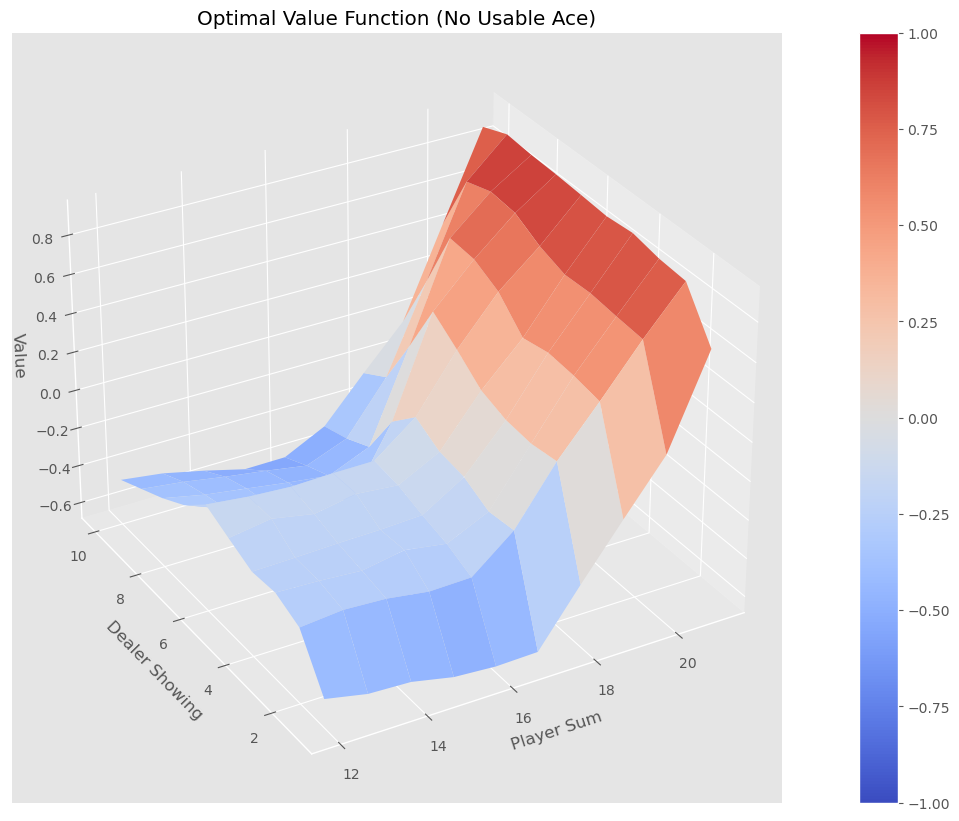

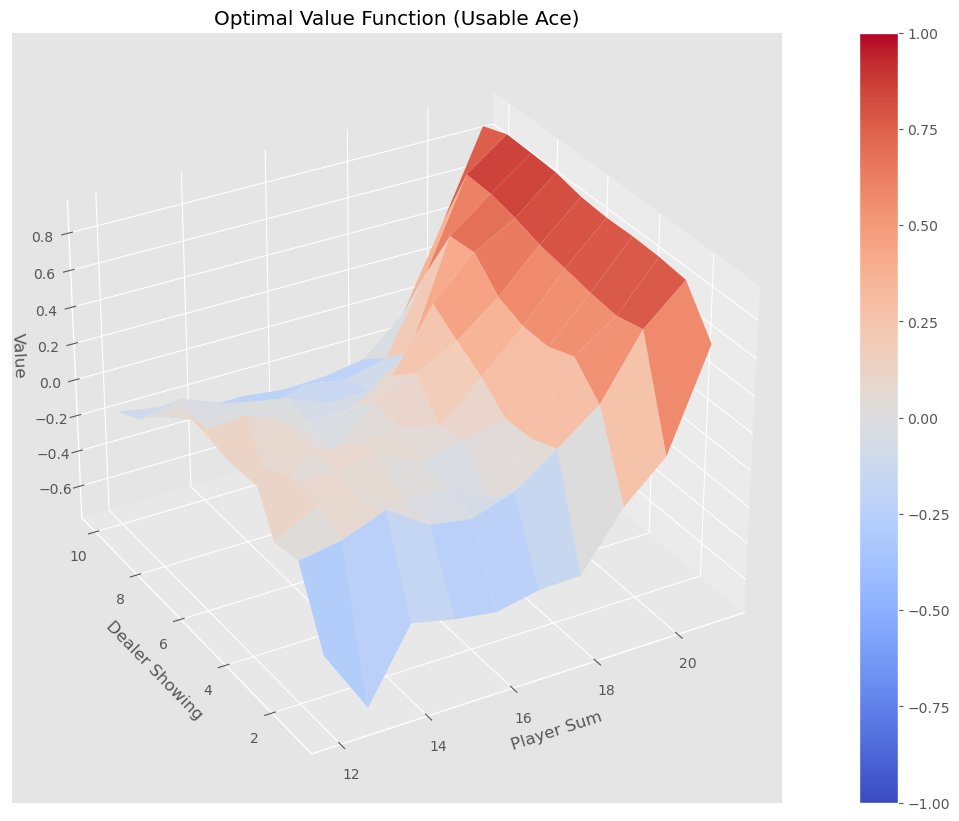

In [18]:
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")